In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns   

#### 코랩 사용시

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.getcwd()

코랩 사용시 본인 구글 드라이브 경로는  
/content/drive/MyDrive/...  
입니다.

In [ ]:
path = './drive/MyDrive/...'    # 과제 데이터셋이 저장된 경로를 더 작성해주세요
os.chdir(path)

In [ ]:
os.getcwd()

## 아파트 전월세 가격 회귀 모델

2020년 전국의 아파트 전월세 거래 데이터셋을 활용합니다.  
해당 데이터셋에서 전세 거래와 월세 거래를 구분한 후,  
보증금 혹은 월세에 가장 큰 영향을 미치는 feature를 찾아  
선형회귀 모델을 세우려고 합니다.

1) Apartment_train.csv, Apartment_test.csv 파일을  
apart_train, apart_test 라는 변수에 DataFrame 형태로 불러와주세요.

In [145]:
apart_train = pd.read_csv('Apartment_train.csv')
apart_test = pd.read_csv('Apartment_test.csv')

In [146]:
apart_train.head()

,시군구,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,대구광역시,트윈팰리스,전세,84.1500,32000,0,13,2006
1,부산광역시,삼익비치,전세,73.9200,12000,0,8,1979
2,대구광역시,동대구반도유보라,월세,39.7596,1000,54,11,2018
3,대전광역시,주공1단지아파트,월세,26.3700,579,8,4,1993
4,광주광역시,선운지구진아리채,전세,78.0887,27000,0,1,2014


In [54]:
apart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      14000 non-null  object 
 1   단지명      14000 non-null  object 
 2   전월세구분    14000 non-null  object 
 3   전용면적(㎡)  14000 non-null  float64
 4   보증금(만원)  14000 non-null  int64  
 5   월세(만원)   14000 non-null  int64  
 6   층        14000 non-null  int64  
 7   건축년도     14000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 875.1+ KB


In [55]:
apart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      3000 non-null   object 
 1   단지명      3000 non-null   object 
 2   전월세구분    3000 non-null   object 
 3   전용면적(㎡)  3000 non-null   float64
 4   보증금(만원)  3000 non-null   int64  
 5   월세(만원)   3000 non-null   int64  
 6   층        3000 non-null   int64  
 7   건축년도     3000 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 187.6+ KB


2) apart 데이터셋에서 월세와 전세를 구분하여  
다음과 같은 4개의 변수에 할당하려고 합니다.  

- train set에서 월세_train, 전세_train  
 test set에서 월세_test, 전세_test  

이에 해당하는 코드를 작성해주세요.


In [57]:
a1 = apart_train['전월세구분'] == '월세'

In [58]:
b1 = apart_train['전월세구분'] == '전세'

In [59]:
a2 = apart_test['전월세구분'] == '월세'

In [60]:
b2 = apart_test['전월세구분'] == '전세'

In [147]:
월세_train = apart_train[a1]
전세_train = apart_train[b1]

월세_test =  apart_test[a2]
전세_test = apart_test[b2]

In [65]:
len(월세_train) + len(전세_train)

14000

3) 이후 작업부터는 따로 언급이 없을 경우  
위에서 생성한 4개의 DataFrame 중  
train set만 이용하여 작업을 수행합니다.  

'월세'의 경우 월세 가격에,  
'전세'의 경우 보증금 가격에 
영향을 가장 많이 미치는 feature를 찾고자 합니다.  

다양한 방법을 동원해서,  
해당하는 feature를 '1개만' 찾아주세요.  

아마도 '월세'와 '전세' 두 경우에서 모두 같은 feature가 나올 것입니다.  

(hint: 상관계수행렬이나 산점도 이용)

In [67]:
월세_train.describe()

,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
count,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000
mean,61.377412,4965.088402,40.058800,8.883617,2007.852798
std,22.475735,7485.730190,36.049317,5.975058,10.319055
min,11.981500,0.000000,0.000000,1.000000,1971.000000
25%,46.900000,1000.000000,17.000000,4.000000,1999.000000
50%,59.884900,2573.000000,33.000000,8.000000,2011.000000
75%,84.152500,6000.000000,50.000000,12.000000,2017.000000
max,244.455000,155000.000000,800.000000,52.000000,2021.000000


In [77]:
월세_train.corr()

,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
전용면적(㎡),1.000000,0.379900,0.473753,0.122702,0.044748
보증금(만원),0.379900,1.000000,0.132703,0.131093,0.156173
월세(만원),0.473753,0.132703,1.000000,0.132955,0.044431
층,0.122702,0.131093,0.132955,1.000000,0.252621
건축년도,0.044748,0.156173,0.044431,0.252621,1.000000


In [81]:
전세_train.corr()

,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
전용면적(㎡),1.000000,0.533033,NaN,0.146494,0.190064
보증금(만원),0.533033,1.000000,NaN,0.185872,0.227700
월세(만원),NaN,NaN,NaN,NaN,NaN
층,0.146494,0.185872,NaN,1.000000,0.266430
건축년도,0.190064,0.227700,NaN,0.266430,1.000000


In [83]:
plt.rcParams['font.family'] = 'NanumGothic'

<AxesSubplot:>

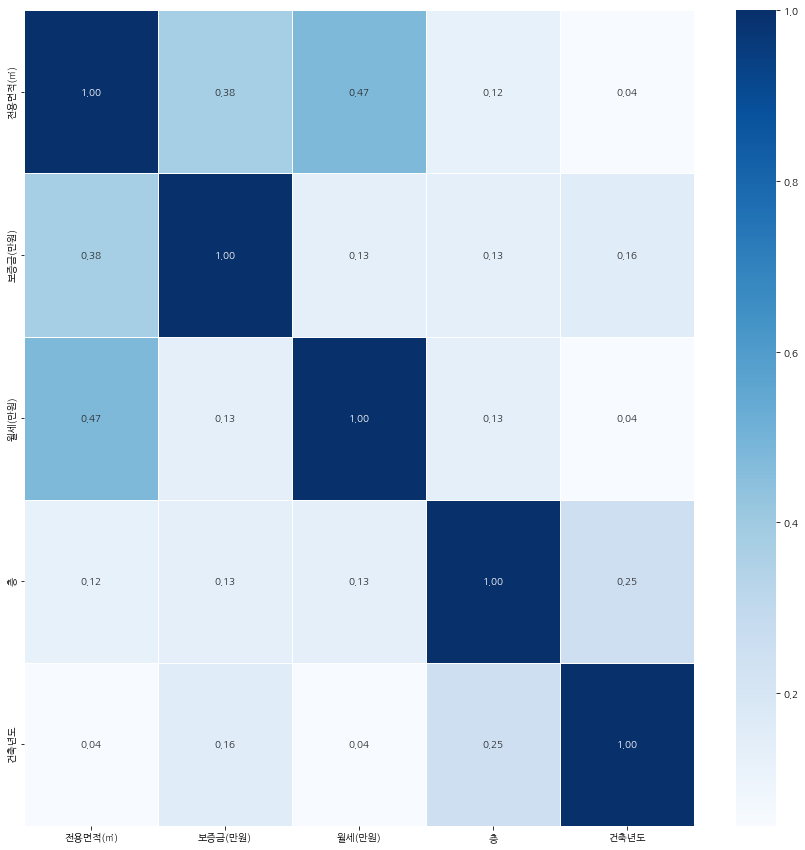

In [86]:
#월세 상관계수 분석
plt.figure(figsize=(15,15))
sns.heatmap(data = 월세_train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

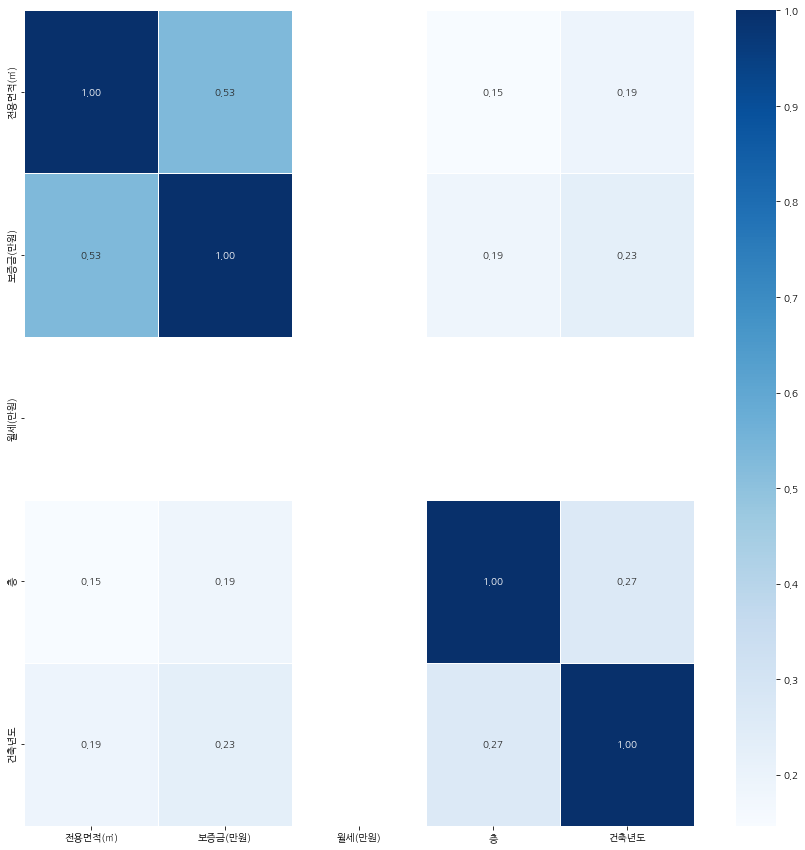

In [87]:
#전세 상관계수 분석
plt.figure(figsize=(15,15))
sns.heatmap(data = 전세_train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

전세, 월세 모두 전용면적 feature의 영향이 가장 큼을 확인할 수 있다.

4) 위에서 찾은 feature를 이용해(이하 X라 칭함)  
'월세'의 경우 월세 가격(이하 y1),  
'전세'의 경우 보증금 가격(이하 y2)  
을 예측하는 모델을 세울 것입니다.

첫번째, 월세 가격을 예측하는 모델을 구축합니다.  
**파이프라인을 사용하지 않고** 작업합니다.  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
 StandardScaler를 사용합니다.(변수명은 scaler)  
- X와 y1의 관계를 나타내는 선형회귀 모델을 구축합니다.  
LinearRegression Estimator(변수명은 lin_reg_1)를 사용합니다.

In [148]:
월세_train.mean()

C:\Users\kddok\AppData\Local\Temp/ipykernel_20228/1699793260.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  월세_train.mean()


전용면적(㎡)      61.377412
보증금(만원)    4965.088402
월세(만원)       40.058800
층             8.883617
건축년도       2007.852798
dtype: float64

In [93]:
월세_train.var()

C:\Users\kddok\AppData\Local\Temp/ipykernel_20228/2483689495.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  월세_train.var()


전용면적(㎡)    5.051587e+02
보증금(만원)    5.603616e+07
월세(만원)     1.299553e+03
층          3.570132e+01
건축년도       1.064829e+02
dtype: float64

In [91]:
전세_train.mean()

C:\Users\kddok\AppData\Local\Temp/ipykernel_20228/2424116640.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  전세_train.mean()


전용면적(㎡)       74.136405
보증금(만원)    21356.303264
월세(만원)         0.000000
층              9.917733
건축년도        2006.830613
dtype: float64

In [95]:
전세_train.var()

C:\Users\kddok\AppData\Local\Temp/ipykernel_20228/2086885035.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  전세_train.var()


전용면적(㎡)    4.847879e+02
보증금(만원)    2.226436e+08
월세(만원)     0.000000e+00
층          4.806029e+01
건축년도       1.147312e+02
dtype: float64

In [106]:
# 관련 모듈 import
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [149]:
# input 데이터는 X_train, target 데이터는 y1_train 변수에 할당
X_train = 월세_train['전용면적(㎡)']
y1_train = 월세_train['월세(만원)']

In [107]:
X_train.describe()

count    4932.000000
mean       61.377412
std        22.475735
min        11.981500
25%        46.900000
50%        59.884900
75%        84.152500
max       244.455000
Name: 전용면적(㎡), dtype: float64

In [150]:
X_train = X_train[:, np.newaxis]

C:\Users\kddok\AppData\Local\Temp/ipykernel_20228/2404535186.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]


In [151]:
# 데이터 scaling 하기
# X 데이터만 scailing 하며,
# 기존 X_train 변수에 덮어씌웁니다.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [152]:
# 선형회귀 모델 생성 후 fitting 시킵니다.
linear_1 = LinearRegression()
linear_1.fit(X_train,y1_train)

LinearRegression()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


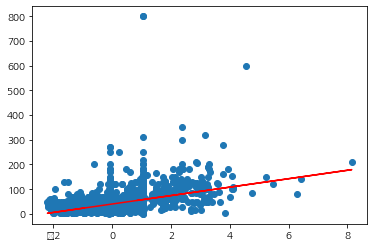

In [153]:
# # 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train)
plt.plot(X_train[:, 0],linear_1.predict(X_train),c='r');

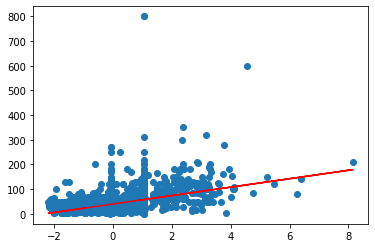

테스트셋, 즉 '월세_test'와  
이미 fitting된 모델을 이용해 predict를 수행합니다.  
y1_hat 이라는 변수에 '월세_test'를 predict한 값을 할당합니다.

In [154]:
# input 데이터는 X_test, target 데이터는 y1_test 변수에 할당
X_test = 월세_test['전용면적(㎡)']
y1_test = 월세_test['월세(만원)']

In [155]:
# X_test 역시 정규화 해주어야 합니다. 주의할점? > fitting(x)
X_test = X_test[:,np.newaxis]
X_test = scaler.transform(X_test)

C:\Users\kddok\AppData\Local\Temp/ipykernel_20228/2215335225.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:,np.newaxis]


In [156]:
# y1_hat에 predict값 할당
y1_hat = linear_1.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


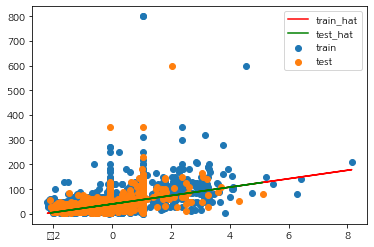

In [157]:
plt.scatter(X_train[:, 0], y1_train, label='train')
plt.scatter(X_test[:, 0], y1_test, label='test')

plt.plot(X_train[:, 0], 
         linear_1.predict(X_train), 
         c='r', label='train_hat')
plt.plot(X_test[:, 0], 
         y1_hat, 
         c='g', label='test_hat')

plt.legend();

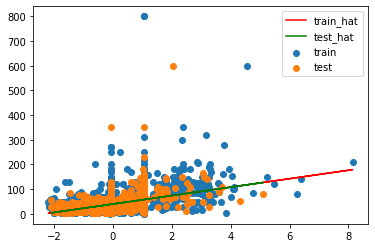

두번째, 전세 보증금 가격(y2) 예측 모델을 구축합니다.  
**파이프라인을 사용하여** 만듭니다. 
파이프라인 이름은 p1으로 정하고,  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
StandardScaler를 사용합니다.(변수명은 scaler)  

- 다항 특성을 만들 것입니다.  
PolynomialFeatrues 변환기를 사용하며,  
차수는 자유이고 bias는 없습니다.(변수명은 poly)  

- X와 y2의 관계를 나타내는 Ridge 모델을 구축합니다.  
Ridge Estimator를 사용하며, hyperparameter는 자유롭게 설정합니다.  
(변수명은 rdg_reg_1)

In [127]:
# 관련 모듈 import
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [134]:
# 파이프라인 생성
p1 = Pipeline([('poly', PolynomialFeatures(degree = 5, include_bias = False)),
               ('scaler', StandardScaler()),
               ('rdg_reg_1', Ridge(alpha=0.5))
               ## 파이프라인 내용 작성 ##
])

In [135]:
# input 데이터는 X_train, target 데이터는 y2_train 변수에 할당
X_train = 전세_train['전용면적(㎡)']
y2_train = 전세_train['보증금(만원)']

In [136]:
X_train = X_train[:,np.newaxis]

C:\Users\kddok\AppData\Local\Temp/ipykernel_20228/859999466.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:,np.newaxis]


In [137]:
# 파이프라인 fitting
p1.fit(X_train, y2_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()), ('rdg_reg_1', Ridge(alpha=0.5))])

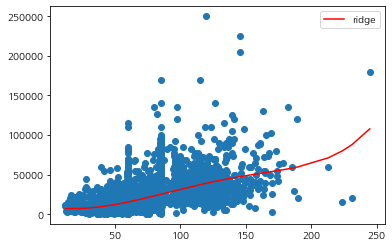

In [138]:
# # 시각화. 체크용입니다.
# # degree=5, alpha=0.5 적용하였을 경우
plt.scatter(X_train[:, 0], y2_train)
plt.plot(np.sort(X_train[:, 0]), 
         np.sort(p1.predict(X_train)), 
         c='r', label='ridge')
plt.legend();

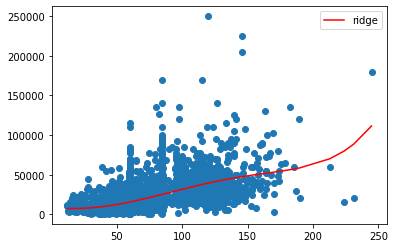

수고하셨습니다.